In [1]:
import pickle

In [2]:
import sys
sys.path.append("../")
sys.path.append("../imagen/")
sys.path.append("../../dataproc")

from utils import *

/rds/general/user/zr523/home/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
region = "North Indian Ocean"
name = "Amphan".replace(' ', '').lower()
start = 0

with open(f"./pkls/{region_to_abbv[region]}_{start:02}_{name}_forecast.pkl", "rb") as file:
    predictions_dict = pickle.load(file)

Text(0.5, 1.0, 'Actual')

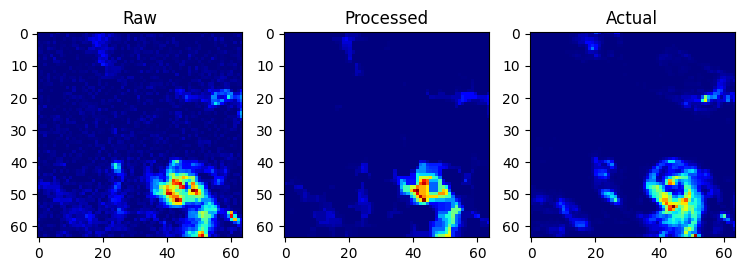

In [4]:
import matplotlib.pyplot as plt
from scipy import ndimage

fig, axs = plt.subplots(1, 3, figsize=(9, 4))

idx = 5
img = predictions_dict['actual']['tp'][idx]
img_p = predictions_dict['predicted']['tp'][idx][0]
img_px = ndimage.minimum_filter(img_p, size=3)

axs[0].imshow(img_p, cmap="jet") ; axs[0].set_title("Raw")
axs[1].imshow(img_px, cmap="jet") ; axs[1].set_title("Processed")
axs[2].imshow(img, cmap="jet") ; axs[2].set_title("Actual")